In [1]:
# Importamos las librerías que usaremos en este análisis.
# pandas → para manejar y analizar datos en forma de tablas (DataFrames)
# matplotlib.pyplot → para crear gráficos sencillos
import pandas as pd
import matplotlib.pyplot as plt

# Mensaje para confirmar que todo funciona correctamente
print("Librerías cargadas correctamente 😎")


Librerías cargadas correctamente 😎


In [2]:
# Cargamos el archivo Walmart.csv que está dentro de nuestra carpeta del proyecto.
# pd.read_csv lee archivos CSV y los convierte en un DataFrame (tabla).
df = pd.read_csv("Walmart.csv")

# Mostramos las primeras 5 filas para ver cómo es la estructura de los datos.
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# df.info() muestra:
# - número de filas
# - número de columnas
# - tipo de datos de cada columna
# - cuántos valores nulos hay
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# df.describe() muestra estadísticas básicas de las columnas numéricas:
# - media
# - mínimo
# - máximo
# - percentiles
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
# Comprobamos cuántos valores nulos tiene cada columna.
# Esto es importante para saber si debemos limpiar datos antes de analizarlos.
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Convertimos la columna Date a tipo fecha
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Verificamos el cambio
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
# Creamos nuevas columnas basadas en la fecha
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week

# Mostramos las primeras filas para comprobar
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


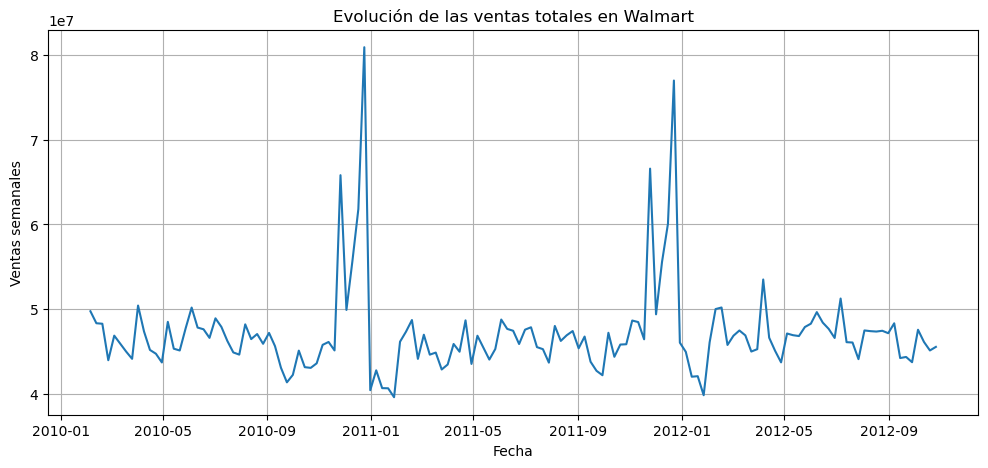

In [8]:
# Agrupamos las ventas por fecha
ventas_por_dia = df.groupby("Date")["Weekly_Sales"].sum()

# Creamos un gráfico de línea
plt.figure(figsize=(12,5))
plt.plot(ventas_por_dia)
plt.title("Evolución de las ventas totales en Walmart")
plt.xlabel("Fecha")
plt.ylabel("Ventas semanales")
plt.grid(True)
plt.show()


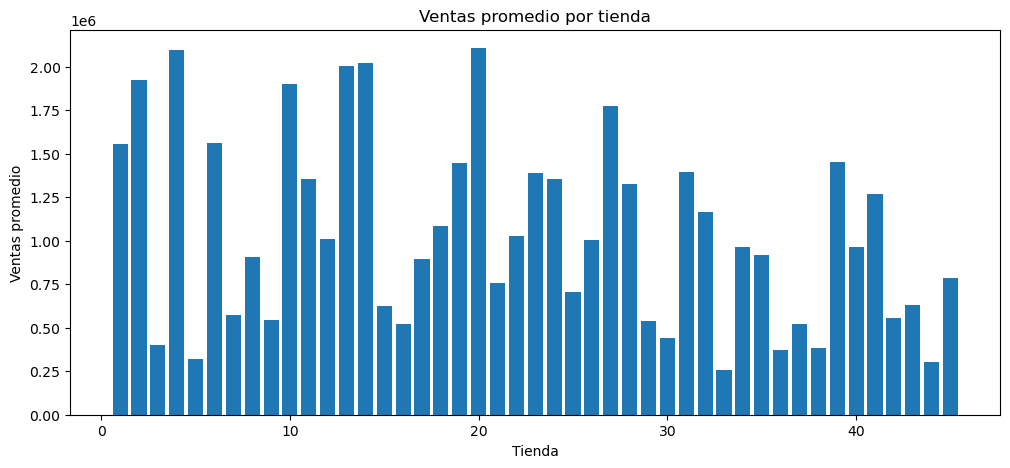

In [9]:
ventas_por_tienda = df.groupby("Store")["Weekly_Sales"].mean()

plt.figure(figsize=(12,5))
plt.bar(ventas_por_tienda.index, ventas_por_tienda.values)
plt.title("Ventas promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas promedio")
plt.show()


In [10]:
# Calculamos la media de ventas en semanas festivas vs no festivas.
ventas_festivos = df[df["Holiday_Flag"] == 1]["Weekly_Sales"].mean()
ventas_no_festivos = df[df["Holiday_Flag"] == 0]["Weekly_Sales"].mean()

ventas_festivos, ventas_no_festivos


(np.float64(1122887.8923555557), np.float64(1041256.3802088555))

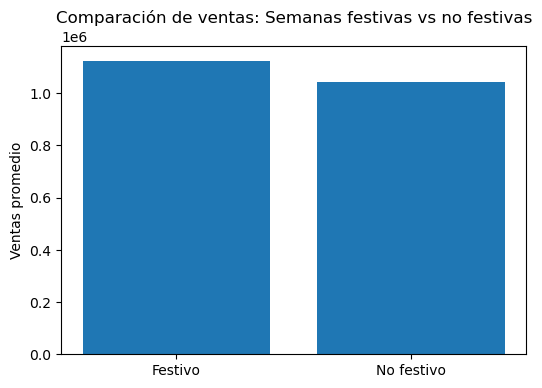

In [11]:
# Creamos un gráfico de barras para comparar visualmente
plt.figure(figsize=(6,4))
plt.bar(["Festivo", "No festivo"], [ventas_festivos, ventas_no_festivos])
plt.title("Comparación de ventas: Semanas festivas vs no festivas")
plt.ylabel("Ventas promedio")
plt.show()


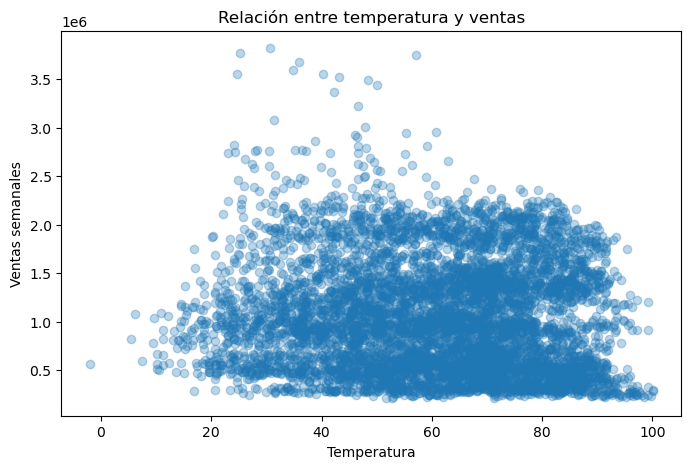

In [12]:
# Gráfico de dispersión para ver si el clima afecta a las ventas
plt.figure(figsize=(8,5))
plt.scatter(df["Temperature"], df["Weekly_Sales"], alpha=0.3)
plt.title("Relación entre temperatura y ventas")
plt.xlabel("Temperatura")
plt.ylabel("Ventas semanales")
plt.show()


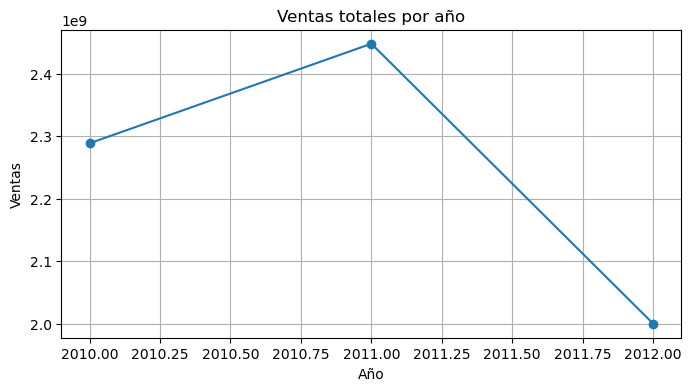

In [13]:
# Agrupamos las ventas por año
ventas_por_anio = df.groupby("Year")["Weekly_Sales"].sum()

plt.figure(figsize=(8,4))
plt.plot(ventas_por_anio.index, ventas_por_anio.values, marker="o")
plt.title("Ventas totales por año")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()


In [14]:
# Identificamos las semanas donde más se vendió
top_semanas = df.nlargest(10, "Weekly_Sales")[["Date", "Store", "Weekly_Sales"]]
top_semanas


,Date,Store,Weekly_Sales
1905,2010-12-24,14,3818686.45
2763,2010-12-24,20,3766687.43
1333,2010-12-24,10,3749057.69
527,2011-12-23,4,3676388.98
1762,2010-12-24,13,3595903.20
1814,2011-12-23,13,3556766.03
2815,2011-12-23,20,3555371.03
475,2010-12-24,4,3526713.39
1385,2011-12-23,10,3487986.89
189,2010-12-24,2,3436007.68
